## Mengimport Library

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve


## Membaca Dataset dan Melakukan Preprocessing

In [2]:
df = pd.read_csv("smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [4]:
df.rename(columns={'height(cm)':'height', 'weight(kg)':'weight','waist(cm)':'waist',
                        'eyesight(left)':'eyesight_left', 'eyesight(right)':'eyesight_right',
                        'hearing(left)':'hearing_left', 'hearing(right)':'hearing_right',
                        'fasting blood sugar':'fasting_blood_sugar',  'Cholesterol':'cholesterol', 
                        'HDL':'hdl','LDL':'ldl','Urine protein':'urine_protein', 
                        'serum creatinine':'serum_creatinine', 'AST':'ast','ALT':'alt',
                        'Gtp':'gtp', 'dental caries' : 'dental_caries'}, inplace=True)

In [5]:
df['gender'] = df['gender'].str.replace('F','0')
df['gender'] = df['gender'].str.replace('M','1')
df['gender'] = pd.to_numeric(df['gender'])

df['tartar'] = df['tartar'].str.replace('N','0')
df['tartar'] = df['tartar'].str.replace('Y','1')
df['tartar'] = pd.to_numeric(df['tartar'])

df['oral'] = df['oral'].str.replace('N','0')
df['oral'] = df['oral'].str.replace('Y','1')
df['oral'] = pd.to_numeric(df['oral'])

In [6]:
df.drop(columns=["ID"], inplace=True)

In [7]:
features = ['gender','age','height','weight','waist','eyesight_left','eyesight_right','hearing_left','hearing_right','systolic','relaxation','fasting_blood_sugar','cholesterol','triglyceride','hdl','ldl','hemoglobin','urine_protein','serum_creatinine','ast','alt','gtp','oral','dental_caries','tartar']
x = df[features]
y = df['smoking']

## Membagi Dataset

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [9]:
print("Jumlah data pada x_train:", x_train.shape[0])
print("Jumlah data pada x_test:", x_test.shape[0])
print("Jumlah data pada y_train:", y_train.shape[0])
print("Jumlah data pada y_test:", y_test.shape[0])

Jumlah data pada x_train: 44553
Jumlah data pada x_test: 11139
Jumlah data pada y_train: 44553
Jumlah data pada y_test: 11139


## Perbandingan Metode

### Logistic Regression

In [10]:
# Logistic regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test,y_pred)
F1_lr = f1_score(y_test,y_pred)
recall_lr = recall_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
print("Score the X-train with Y-train is : ", lr.score(x_train,y_train))
print("Score the X-test with Y-test  is : ", lr.score(x_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with Y-train is :  0.7193679437972752
Score the X-test with Y-test  is :  0.7208905646826466
Accuracy Score : 72.08905646826466


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
lr_report=classification_report(y_pred,y_test)
print(lr_report)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      7391
           1       0.58      0.63      0.60      3748

    accuracy                           0.72     11139
   macro avg       0.69      0.70      0.69     11139
weighted avg       0.73      0.72      0.72     11139



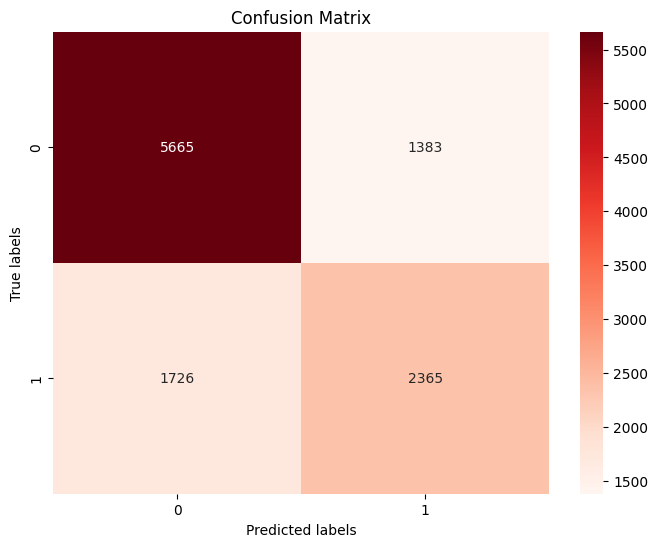

In [12]:
# Confusion Matrix of logistic Regression on testing set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

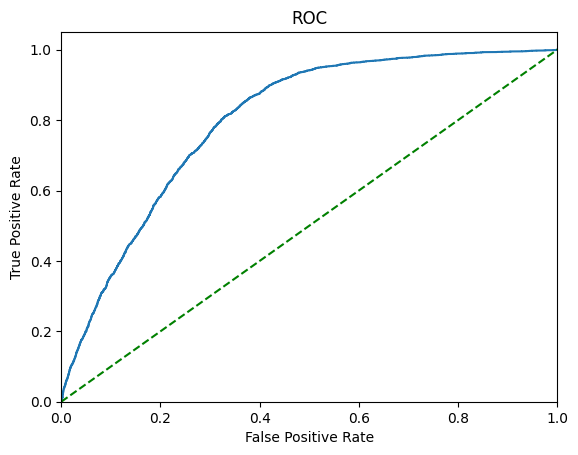

In [13]:
lr_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### Random Forest

In [14]:
rf_model = RandomForestClassifier(n_estimators = 200)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred)
F1_rf= f1_score(y_test,y_pred)
recall_rf = recall_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
print("Score the X-train with Y-train is : ", rf_model.score(x_train,y_train))
print("Score the X-test with Y-test  is : ", rf_model.score(x_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with Y-train is :  1.0
Score the X-test with Y-test  is :  0.8352634886435047
Accuracy Score : 83.52634886435048


In [15]:
rf_report=classification_report(y_pred,y_test)
print(rf_report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6883
           1       0.80      0.77      0.78      4256

    accuracy                           0.84     11139
   macro avg       0.83      0.82      0.82     11139
weighted avg       0.83      0.84      0.83     11139



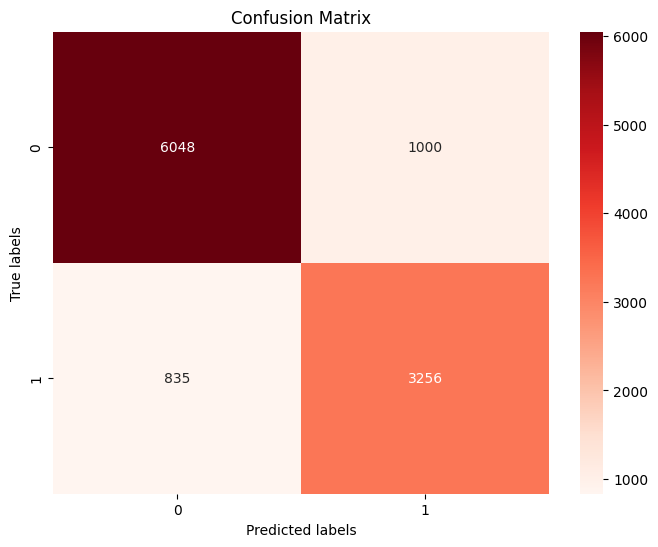

In [16]:
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

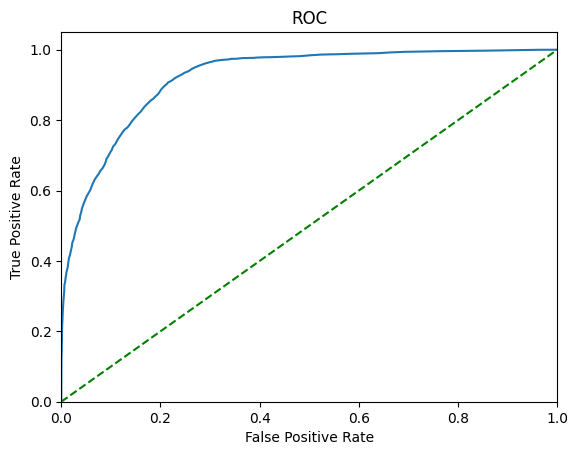

In [17]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Text(0.5, 0, 'Feature Importance Random Forest')

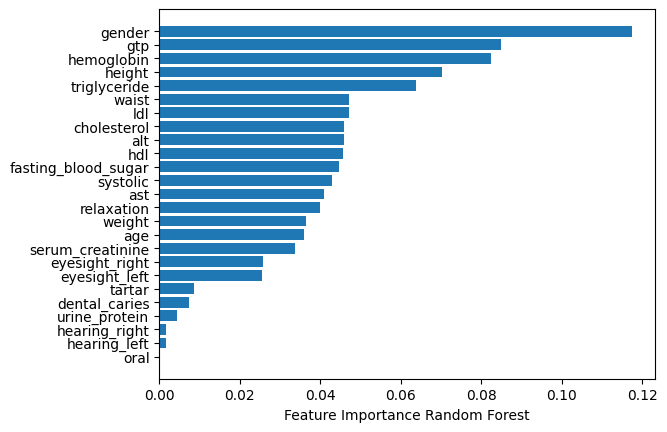

In [18]:
# Feature Importance for random forest classifier
sort = rf_model.feature_importances_.argsort()
plt.barh(df.columns[sort], rf_model.feature_importances_[sort])
plt.xlabel("Feature Importance Random Forest")

### Decision Tree

In [19]:
# Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
accuracy_tree = accuracy_score(y_test,y_pred)
F1_tree= f1_score(y_test,y_pred)
recall_tree = recall_score(y_test, y_pred)
precision_tree = precision_score(y_test, y_pred)
print("Score the X-train with Y-train is : ", tree.score(x_train,y_train))
print("Score the X-test with Y-test  is : ", tree.score(x_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with Y-train is :  1.0
Score the X-test with Y-test  is :  0.7753837866953945
Accuracy Score : 77.53837866953945


In [20]:
tree_report=classification_report(y_pred,y_test)
print(tree_report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7062
           1       0.69      0.69      0.69      4077

    accuracy                           0.78     11139
   macro avg       0.76      0.76      0.76     11139
weighted avg       0.78      0.78      0.78     11139



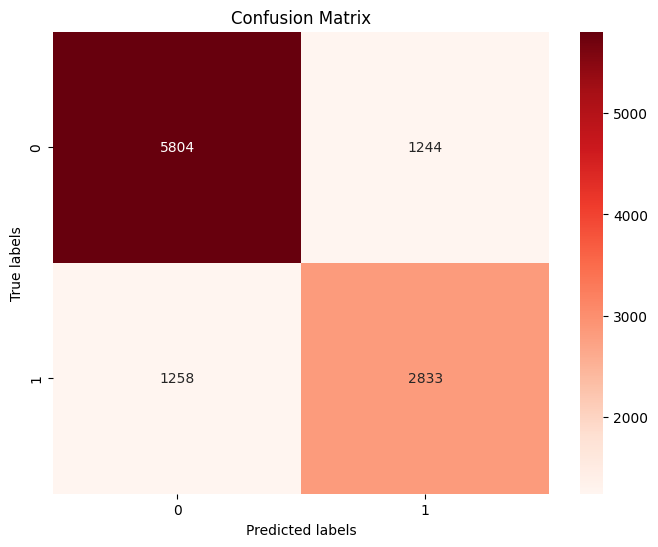

In [21]:
cm_tree = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, cmap='Reds', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

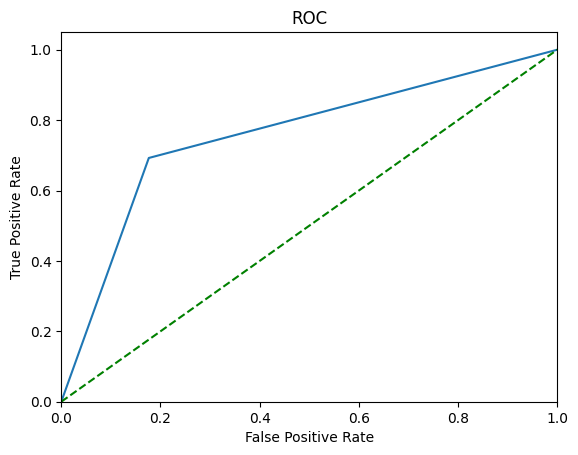

In [22]:
tree_roc_auc = roc_auc_score(y_test, tree.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Text(0.5, 0, 'Feature Importance Decision Tree')

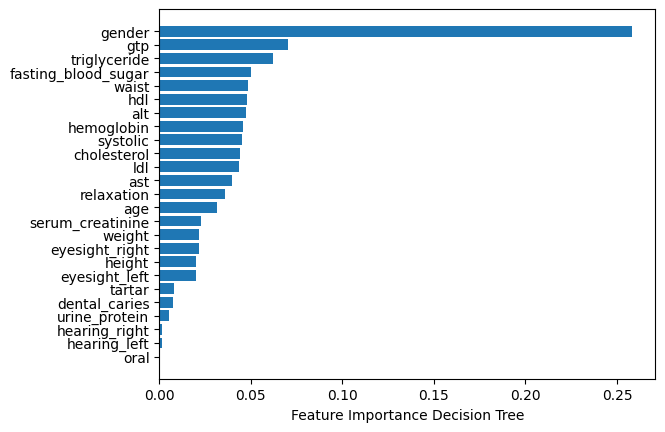

In [23]:
# Feature Importance for decision tree classifier
sort = tree.feature_importances_.argsort()
plt.barh(df.columns[sort], tree.feature_importances_[sort])
plt.xlabel("Feature Importance Decision Tree")

### KNN

In [24]:
#KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test,y_pred)
F1_knn= f1_score(y_test,y_pred)
recall_knn = recall_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
print("Score the X-train with Y-train is : ", knn.score(x_train,y_train))
print("Score the X-test with Y-test  is : ", knn.score(x_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with Y-train is :  0.787376832087626
Score the X-test with Y-test  is :  0.7167609300655355
Accuracy Score : 71.67609300655356


In [25]:
knn_report=classification_report(y_pred,y_test)
print(knn_report)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      7347
           1       0.58      0.62      0.60      3792

    accuracy                           0.72     11139
   macro avg       0.69      0.69      0.69     11139
weighted avg       0.72      0.72      0.72     11139



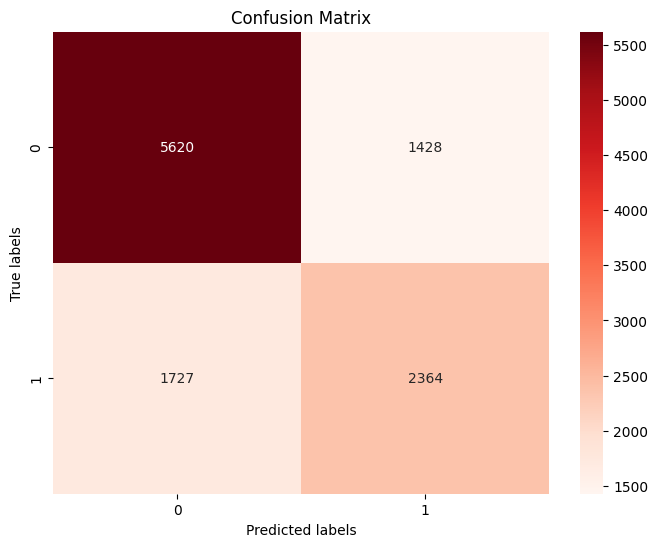

In [26]:
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Reds', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

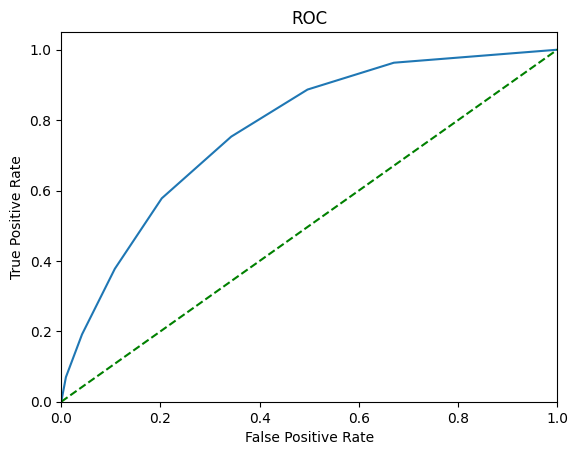

In [27]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### SVM

In [28]:
#SVM classifier
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test,y_pred)
F1_svm= f1_score(y_test,y_pred)
recall_svm = recall_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
print("Score the X-train with Y-train is : ", svm.score(x_train,y_train))
print("Score the X-test with Y-test  is : ", svm.score(x_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with Y-train is :  0.7337553026732206
Score the X-test with Y-test  is :  0.7337283418619266
Accuracy Score : 73.37283418619266


In [29]:
svm_report=classification_report(y_pred,y_test)
print(svm_report)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      7734
           1       0.55      0.67      0.60      3405

    accuracy                           0.73     11139
   macro avg       0.70      0.71      0.70     11139
weighted avg       0.75      0.73      0.74     11139



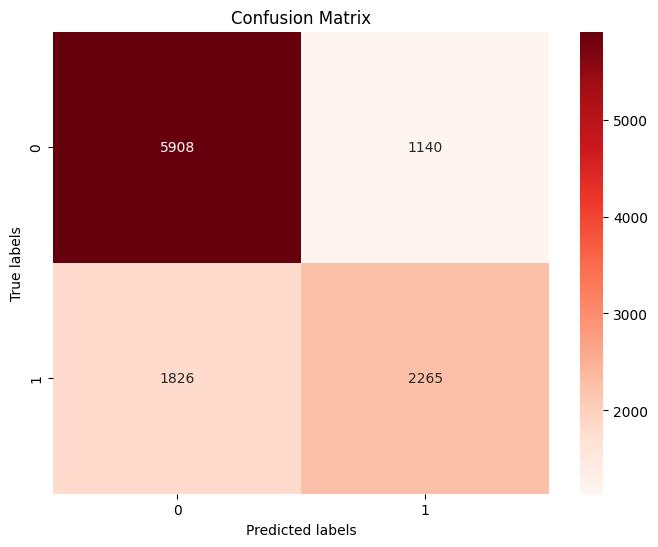

In [30]:
cm_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Reds', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

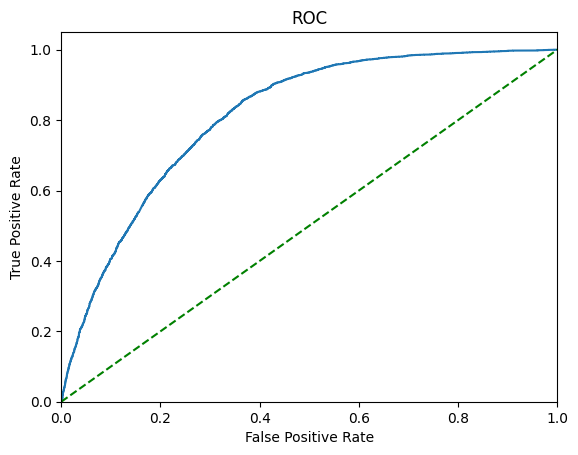

In [31]:
svm_roc_auc = roc_auc_score(y_test, svm.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### Naive Bayes

In [32]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)
y_pred = naive_bayes.predict(x_test)
accuracy_naive_bayes = accuracy_score(y_test,y_pred)
F1_naive_bayes= f1_score(y_test,y_pred)
recall_naive_bayes = recall_score(y_test, y_pred)
precision_naive_bayes = precision_score(y_test, y_pred)
print("Score the X-train with Y-train is : ", naive_bayes.score(x_train,y_train))
print("Score the X-test with Y-test  is : ", naive_bayes.score(x_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with Y-train is :  0.7019055955827891
Score the X-test with Y-test  is :  0.7076039141754197
Accuracy Score : 70.76039141754197


In [33]:
naive_bayes_report=classification_report(y_pred,y_test)
print(naive_bayes_report)

              precision    recall  f1-score   support

           0       0.66      0.84      0.74      5535
           1       0.79      0.57      0.66      5604

    accuracy                           0.71     11139
   macro avg       0.72      0.71      0.70     11139
weighted avg       0.72      0.71      0.70     11139



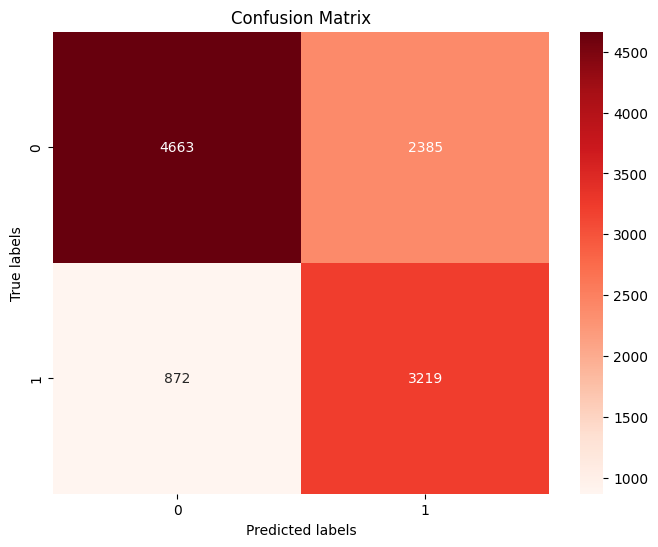

In [34]:
cm_naive_bayes = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_naive_bayes, annot=True, cmap='Reds', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

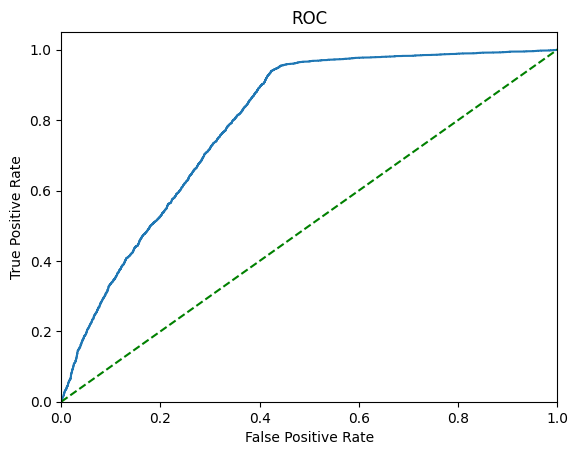

In [35]:
naive_bayes_roc_auc = roc_auc_score(y_test, naive_bayes.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % naive_bayes_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### LDA

In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_test, y_test)
y_pred = lda.predict(x_test)
accuracy_lda = accuracy_score(y_test,y_pred)
F1_lda= f1_score(y_test,y_pred)
recall_lda = recall_score(y_test, y_pred)
precision_lda = precision_score(y_test, y_pred)
print("Score the X-train with Y-train is : ", lda.score(x_train,y_train))
print("Score the X-test with Y-test  is : ", lda.score(x_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with Y-train is :  0.7415886696743205
Score the X-test with Y-test  is :  0.7479127390250472
Accuracy Score : 74.79127390250471


In [37]:
lda_report=classification_report(y_pred,y_test)
print(lda_report)

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      6088
           1       0.77      0.63      0.69      5051

    accuracy                           0.75     11139
   macro avg       0.75      0.74      0.74     11139
weighted avg       0.75      0.75      0.74     11139



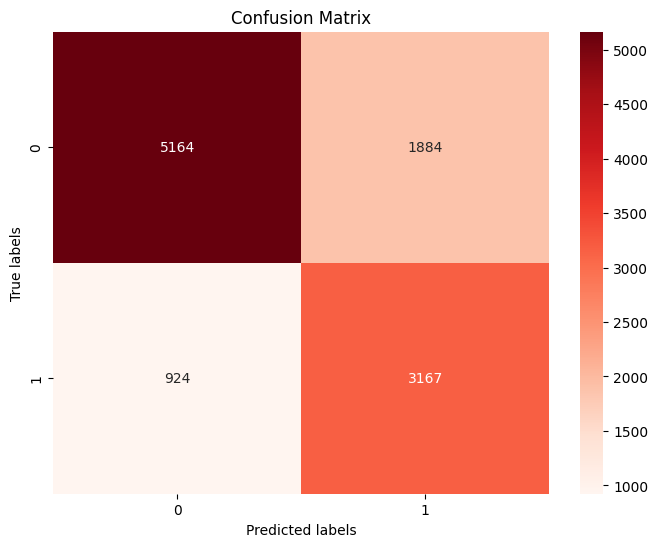

In [38]:
cm_lda = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, cmap='Reds', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

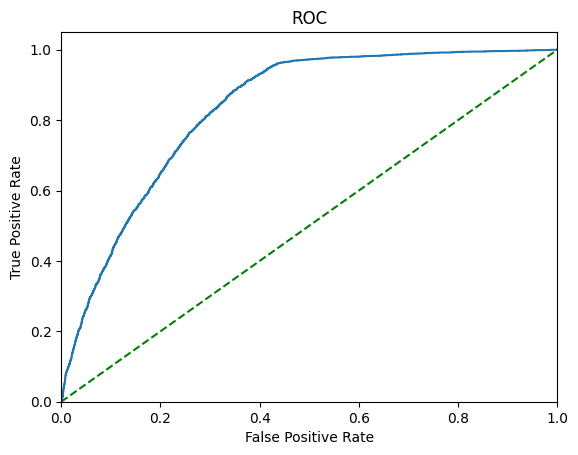

In [39]:
lda_roc_auc = roc_auc_score(y_test, lda.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lda.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### LASSO

In [40]:
lasso_classifier = LogisticRegression(penalty='l1', solver='liblinear')
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso = GridSearchCV(lasso_classifier, parameters, cv=5)

lasso.fit(x_train, y_train)
print("Best Parameters:", lasso.best_params_)
print("Best Score:", lasso.best_score_)

Best Parameters: {'C': 10}
Best Score: 0.7449554662071027


In [41]:
y_pred = lasso.predict(x_test)
accuracy_lasso = accuracy_score(y_test,y_pred)
F1_lasso= f1_score(y_test,y_pred)
recall_lasso = recall_score(y_test, y_pred)
precision_lasso = precision_score(y_test, y_pred)
print("Score the X-train with Y-train is : ", lasso.score(x_train,y_train))
print("Score the X-test with Y-test  is : ", lasso.score(x_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with Y-train is :  0.7455390209413507
Score the X-test with Y-test  is :  0.746925217703564
Accuracy Score : 74.69252177035641


In [42]:
lasso_report=classification_report(y_pred,y_test)
print(lasso_report)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      6777
           1       0.69      0.65      0.67      4362

    accuracy                           0.75     11139
   macro avg       0.73      0.73      0.73     11139
weighted avg       0.74      0.75      0.75     11139



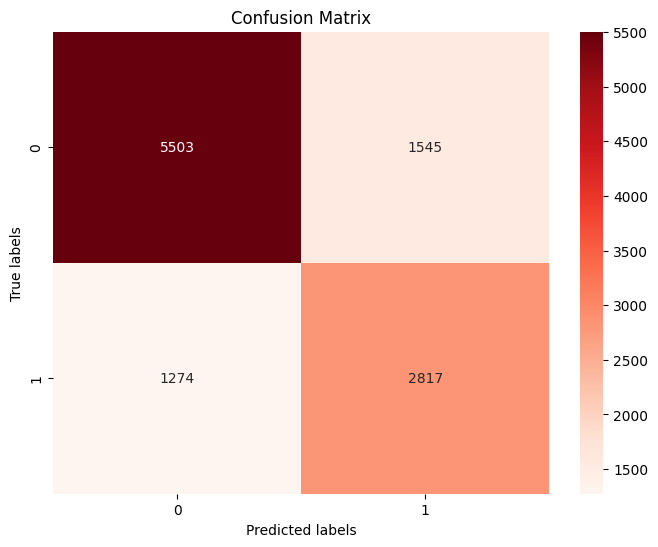

In [43]:
cm_lasso = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lasso, annot=True, cmap='Reds', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

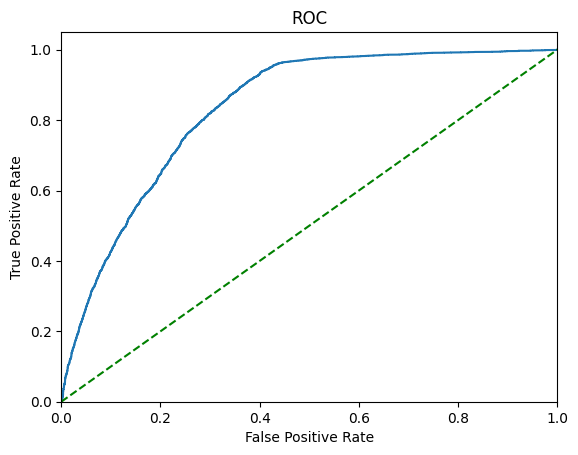

In [44]:
lasso_roc_auc = roc_auc_score(y_test, lasso.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lasso.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % lasso_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## Perbandingan

In [45]:
# All Results
results = pd.DataFrame({"Models":["Logistic Regression", "Decision Tree","Random Forest","KNN","SVM","Naive Bayes","LDA","LASSO"],
                        "Accuracy":[accuracy_lr,accuracy_tree,accuracy_rf, accuracy_knn,accuracy_svm,accuracy_naive_bayes,accuracy_lda,accuracy_lasso],
                        "F1 Score":[F1_lr, F1_tree, F1_rf,F1_knn,F1_svm,F1_naive_bayes,F1_lda,F1_lasso], 
                        "Precision":[precision_lr, precision_tree,precision_rf,precision_knn,precision_svm,precision_naive_bayes,precision_lda,precision_lasso], 
                        "Recall":[recall_lr,recall_tree,recall_rf,recall_knn,recall_svm,recall_naive_bayes,recall_lda,recall_lasso]})
results

,Models,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.720891,0.603393,0.631003,0.578098
1,Decision Tree,0.775384,0.693683,0.694874,0.692496
2,Random Forest,0.835263,0.780161,0.765038,0.795893
3,KNN,0.716761,0.599772,0.623418,0.577854
4,SVM,0.733728,0.604322,0.665198,0.553654
5,Naive Bayes,0.707604,0.664054,0.574411,0.786849
6,LDA,0.747913,0.692846,0.627005,0.774138
7,LASSO,0.746925,0.666509,0.645805,0.688585
